Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
## Importing Important Libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop('Loan_ID', axis=1)

In [4]:
df.shape

(614, 12)

In [5]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

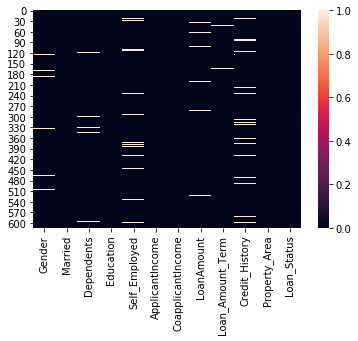

In [7]:
sns.heatmap(df.isnull())

In [8]:
# fill the missing values for numerical columns - median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# fill the missing values for categorical columns - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

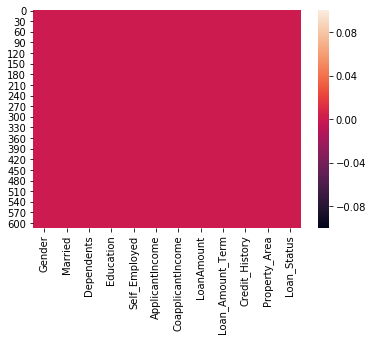

In [10]:
sns.heatmap(df.isnull())

#  Summary Statistics

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# EDA

In [12]:
# To Check correlation
dfcor=df.corr()
dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


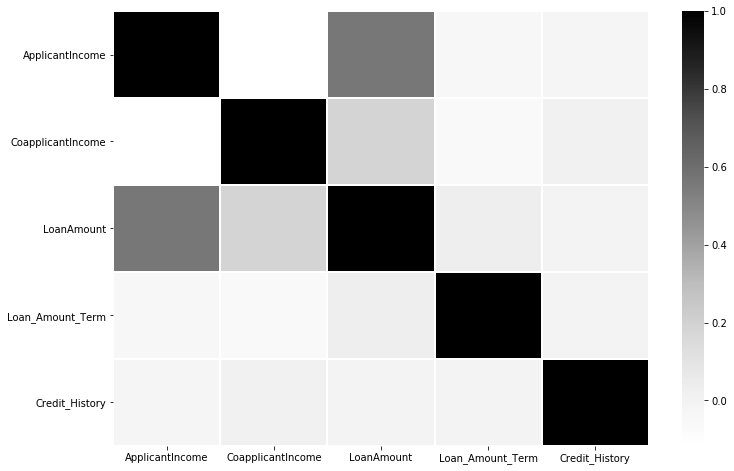

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Greys',linewidths=1)

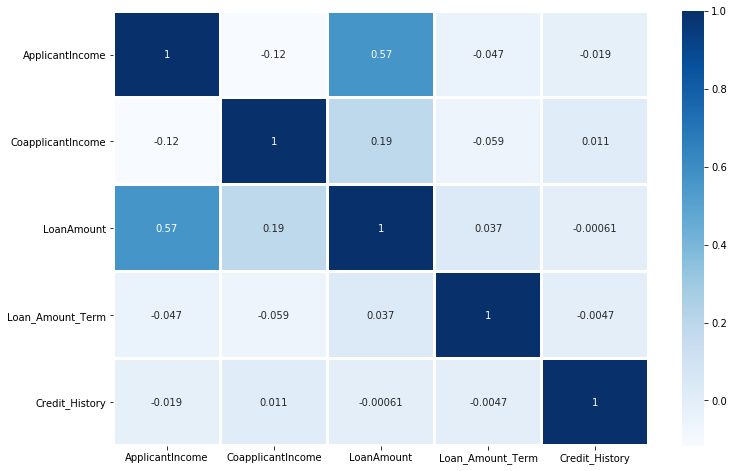

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidths=2)

In [15]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
#all the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

Gender: ['Male' 'Female']
Male      502
Female    112
Name: Gender, dtype: int64


Married: ['No' 'Yes']
Yes    401
No     213
Name: Married, dtype: int64


Dependents: ['0' '1' '2' '3+']
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education: ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed: ['No' 'Yes']
No     532
Yes     82
Name: Self_Employed, dtype: int64


Property_Area: ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status: ['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64




For Categorical Columns

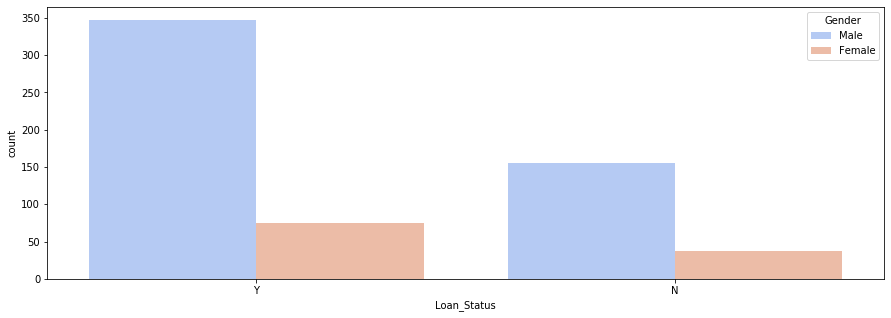

In [17]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Gender', data=df)

For Catagorical Columns

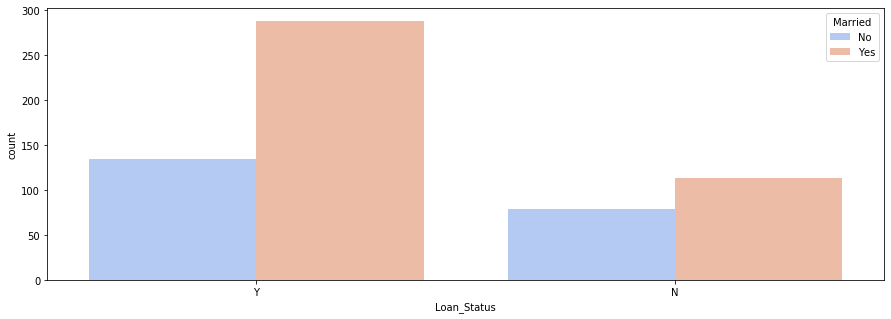

In [18]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Married', data=df)

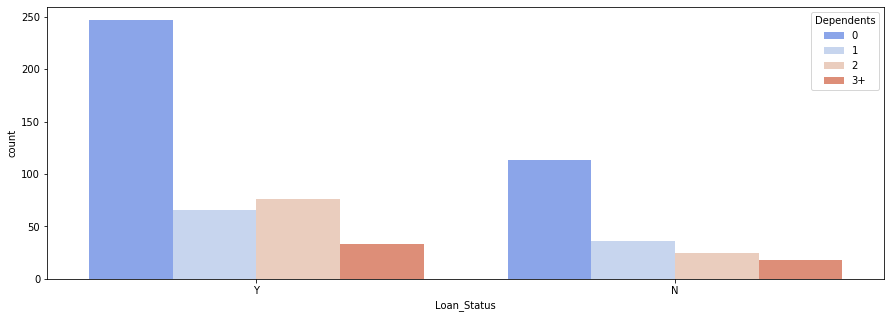

In [19]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Dependents', data=df)

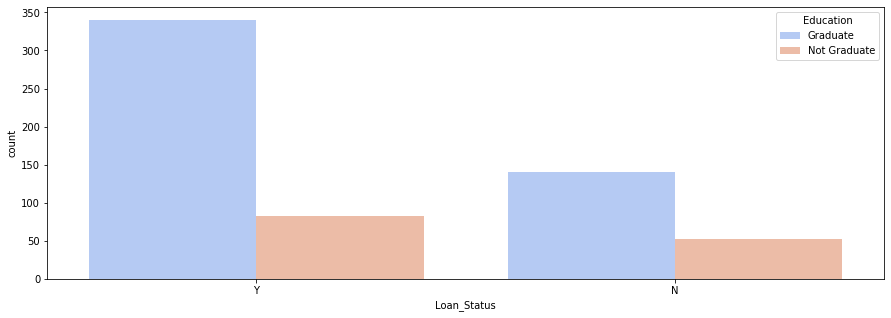

In [20]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Education', data=df)

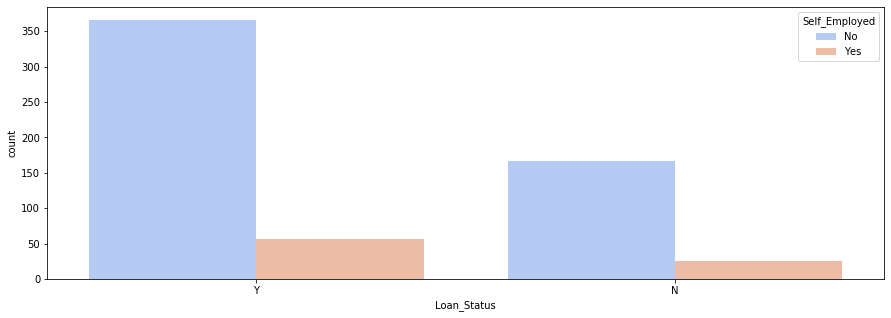

In [21]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Self_Employed', data=df)

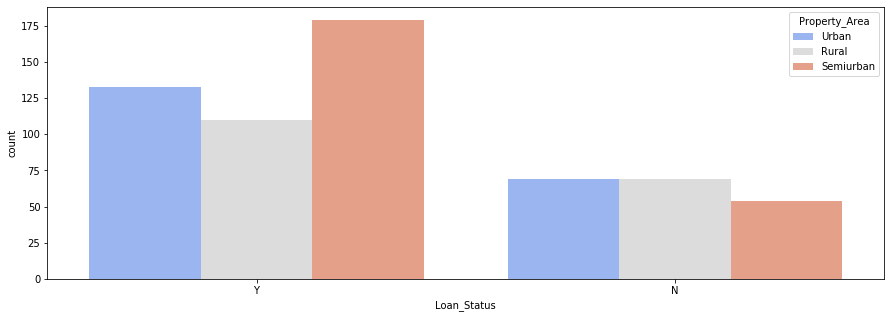

In [22]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Property_Area', data=df)

For Numerical Columns

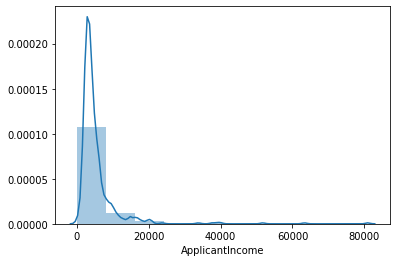

In [23]:
sns.distplot(df['ApplicantIncome'],bins=10)

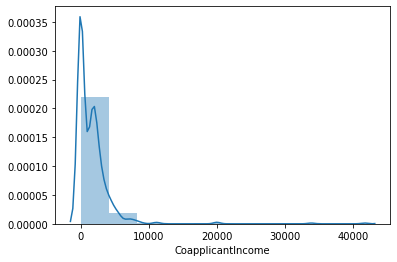

In [24]:
sns.distplot(df["CoapplicantIncome"],bins=10)

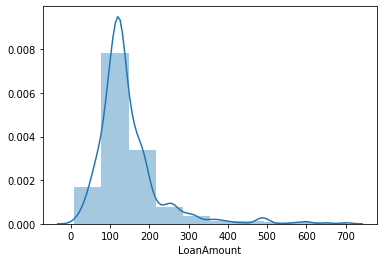

In [25]:
sns.distplot(df["LoanAmount"],bins=10)

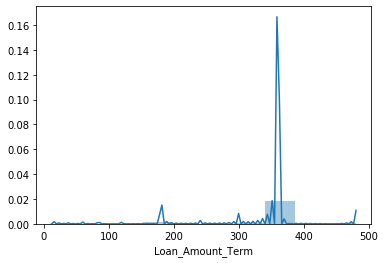

In [26]:
sns.distplot(df['Loan_Amount_Term'],bins=10)

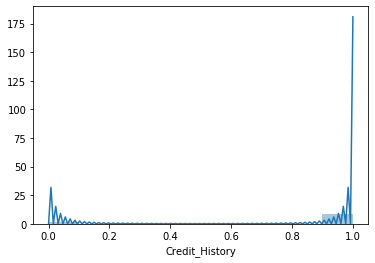

In [27]:
sns.distplot(df['Credit_History'],bins=10)

Preprocessing

In [28]:
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
#seprating the features and label columns
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

In [31]:
#As the data points differ a lot in magnitude we'll Scale them using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
x_train

array([[ 4.37797518e-01,  6.96009386e-01,  1.70184967e-01, ...,
         2.84327192e-01,  4.03238919e-01, -2.94372405e-03],
       [ 4.37797518e-01,  6.96009386e-01,  1.11835836e+00, ...,
         2.84327192e-01,  4.03238919e-01,  1.25991389e+00],
       [ 4.37797518e-01, -1.43676223e+00, -7.77988423e-01, ...,
        -3.35675834e+00,  4.03238919e-01, -2.94372405e-03],
       ...,
       [ 4.37797518e-01,  6.96009386e-01, -7.77988423e-01, ...,
         2.84327192e-01,  4.03238919e-01,  1.25991389e+00],
       [-2.28416096e+00, -1.43676223e+00,  2.06653175e+00, ...,
         2.84327192e-01,  4.03238919e-01, -1.26580134e+00],
       [ 4.37797518e-01,  6.96009386e-01, -7.77988423e-01, ...,
         2.84327192e-01,  4.03238919e-01, -2.94372405e-03]])

In [33]:
x_test

array([[ 0.55028802, -1.23864707,  0.4981548 , ...,  0.24628882,
         0.43115825,  1.1458434 ],
       [-1.81723019,  0.80733247, -0.65382817, ...,  0.24628882,
         0.43115825, -0.15465371],
       [ 0.55028802, -1.23864707, -0.65382817, ...,  0.24628882,
         0.43115825, -1.45515083],
       ...,
       [-1.81723019, -1.23864707, -0.65382817, ...,  2.22730756,
        -2.31933403,  1.1458434 ],
       [-1.81723019, -1.23864707, -0.65382817, ...,  0.24628882,
         0.43115825, -1.45515083],
       [ 0.55028802,  0.80733247, -0.65382817, ..., -2.7252393 ,
         0.43115825, -0.15465371]])

# Model Building

In [34]:
#Using Logistic Regression 
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 81.08108108108108
Cross validation is 80.42134062927498


In [35]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
print("Accuracy is", knn.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(knn, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 77.83783783783784
Cross validation is 78.32284541723666


In [36]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(x_train,y_train)
print("Accuracy is", gauss.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(gauss, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 79.45945945945945
Cross validation is 79.48837209302326


In [37]:
#Using Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
print("Accuracy is", tree.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(tree, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 68.64864864864865
Cross validation is 69.2421340629275


In [38]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(x_train,y_train)
print("Accuracy is", forest.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(forest, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 74.5945945945946
Cross validation is 76.4514363885089


# Hyperparameter Tuning

In [39]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [40]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [41]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [42]:
#Lets see the best parameter as per the our grid search
best_clf.best_estimator_

LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [43]:
lr = LogisticRegression(C=0.03359818286283781, solver='liblinear')
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)

Accuracy is 81.62162162162161


# Confusion Matrix

In [44]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 29,  33],
       [  1, 122]], dtype=int64)

# Model Saving

In [45]:
import joblib
joblib.dump(lr,"FinalModel.pkl")

['FinalModel.pkl']